<a href="https://colab.research.google.com/github/brianharnish/cs419/blob/master/projects/brain_crate_and_barrel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

# 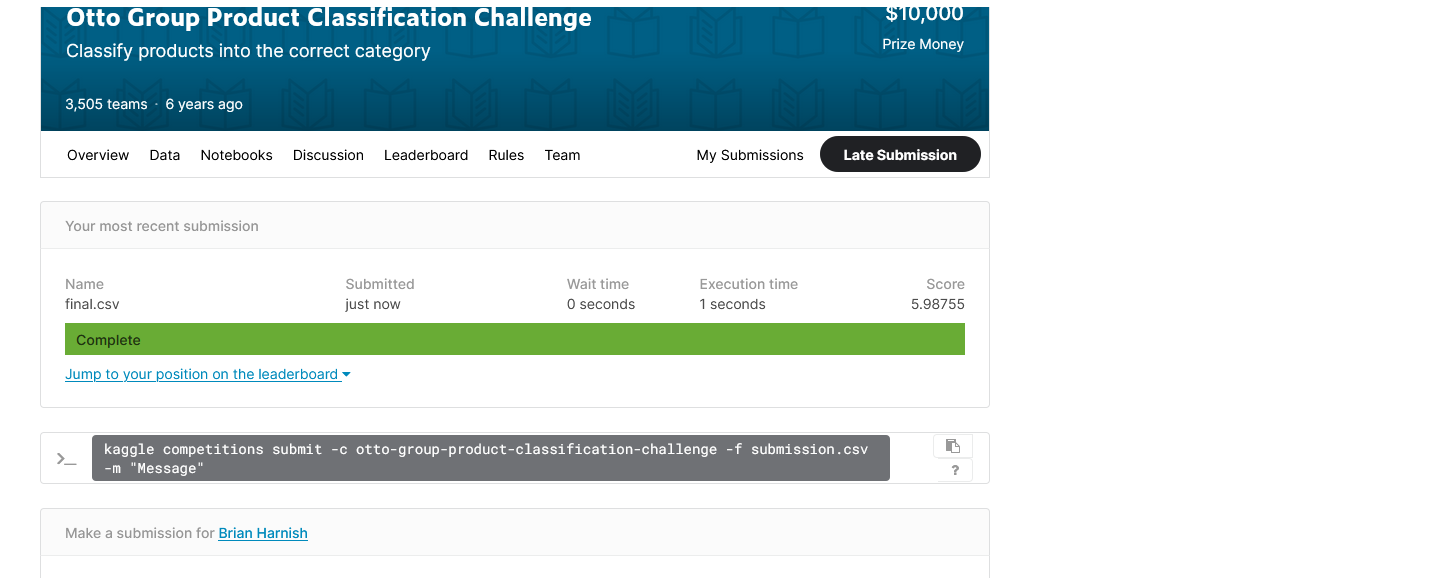

In [8]:
!unzip otto-group-product-classification-challenge.zip

Archive:  otto-group-product-classification-challenge.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [9]:
!ls

otto-group-product-classification-challenge.zip  test.csv
sample_data					 train.csv
sampleSubmission.csv


In [10]:
train_data = pd.read_csv('train.csv', index_col='id')
test_data = pd.read_csv('test.csv', index_col='id')
train_data

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,4,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,...,0,0,2,0,0,11,0,1,1,0,1,0,7,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
4,1,0,0,1,6,1,5,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,7,2,2,0,0,0,58,0,10,0,0,0,0,0,3,0,0,...,1,0,0,0,0,0,0,0,0,0,2,1,5,0,0,4,0,0,2,1,0,1,0,0,1,1,2,2,0,22,0,1,2,0,0,0,0,0,0,Class_1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,Class_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61874,1,0,0,1,1,0,0,0,0,0,0,1,3,0,0,9,0,2,0,0,0,7,0,3,6,1,0,0,65,1,0,4,3,1,1,1,2,1,0,2,...,3,1,0,0,0,1,0,22,0,1,4,11,3,0,0,3,0,1,1,2,0,0,29,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,Class_9
61875,4,0,0,0,0,0,0,0,0,0,0,0,4,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,2,1,0,2,0,0,0,0,...,0,0,0,0,0,0,0,1,2,0,0,1,5,0,0,0,0,0,0,0,0,0,1,0,11,0,0,0,0,0,0,2,0,0,2,0,0,1,0,Class_9
61876,0,0,0,0,0,0,0,3,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,2,0,0,0,0,...,0,0,0,0,19,0,0,4,0,0,0,0,18,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,Class_9


In [11]:
train_data_features = train_data.drop('target', axis=1)
train_data_labels = train_data['target']
test_data

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,...,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,3,0,0,0,3,2,1,0,0,0,0,0,0,0,5,3,1,1,0,0,0,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11,1,20,0,0,0,0,0
2,2,2,14,16,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,2,0,4,0,4,0,0,0,0,2,0,0,0,8,0,0,0,0,0,...,24,0,0,0,0,0,0,0,0,0,6,8,0,0,0,0,0,0,0,0,0,0,0,2,0,0,4,0,2,0,0,0,0,0,0,4,0,0,2,0
3,0,1,12,1,0,0,0,0,0,0,7,1,0,0,0,7,0,2,0,0,0,4,0,0,0,1,1,2,0,0,0,0,0,0,1,0,0,2,0,0,...,10,1,0,2,0,0,1,6,1,1,0,0,1,1,1,2,0,0,2,0,0,0,0,0,0,0,6,0,2,0,0,0,0,0,2,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,21,3,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,2,0,0,0,0,1,0,0,...,2,0,0,0,0,0,0,0,9,0,0,2,0,0,0,0,6,0,8,0,0,0,0,1,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0
5,1,0,0,1,0,0,1,2,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,4,0,5,16,0,0,0,0,0,0,1,0,0,0,0,0,0,0,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144364,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,5,0,0,1,0,1,0,2,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,...,0,2,0,0,0,0,0,0,0,0,2,0,0,9,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,2,1,1,0,0,0,0,0
144365,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,1,11,0,0,0,0,0
144366,0,1,0,0,0,0,1,1,0,0,0,0,0,7,0,1,0,0,0,0,0,0,0,1,5,0,0,0,0,0,0,0,1,0,1,0,3,1,0,6,...,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,5,0,0,1,2,0,0,0,0,0,0,0,0,0,0,1,3,1,1,0,0,1,0,0


In [12]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
model = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor')

param_grid = [{'n_estimators': [50, 100, 150, 200, 400], 
    'max_depth': [2, 4, 6, 8, 9]}]

param_comb = 5
folds=8 
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001) 
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=param_comb,  n_jobs=-1, 
                                   cv=skf.split(train_data_features, train_data_labels), verbose=3)

In [13]:
%%time 
grid_result = random_search.fit(train_data_features, train_data_labels)

Fitting 8 folds for each of 5 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 15.8min finished


CPU times: user 31.6 s, sys: 13.2 s, total: 44.8 s
Wall time: 16min 32s


In [16]:
predictions = random_search.best_estimator_.predict(test_data)
predictions

ValueError: ignored

In [17]:
test_data['cat'] = predictions
final = pd.get_dummies(test_data['cat']) 
final
final.to_csv('final.csv', index=True)
!ls

final.csv					 sampleSubmission.csv
otto-group-product-classification-challenge.zip  test.csv
sample_data					 train.csv
